Class Distribution:
diagnosis
1    1852
0    1796
Name: count, dtype: int64


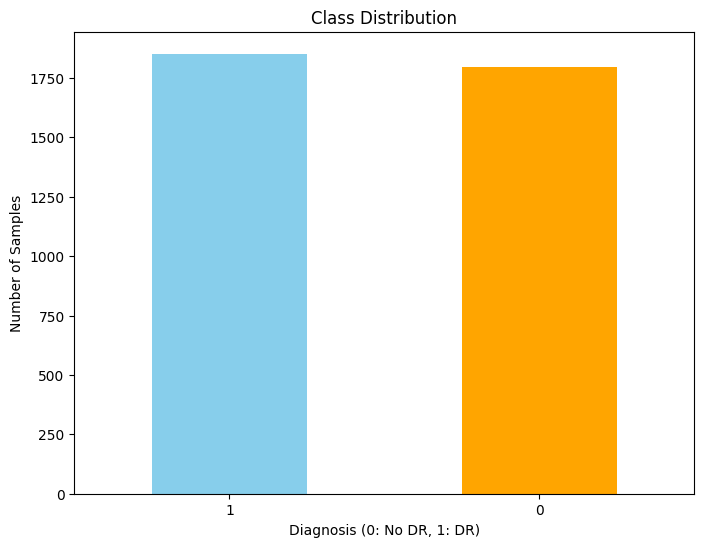

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
cleaned_csv_path = r"D:\APTOS data\fyp_processed_dataset\cleaned_image_labels.csv"
data = pd.read_csv(cleaned_csv_path)

# Class distribution
class_counts = data['diagnosis'].value_counts()
print("Class Distribution:")
print(class_counts)

# Visualize the distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Class Distribution")
plt.xlabel("Diagnosis (0: No DR, 1: DR)")
plt.ylabel("Number of Samples")
plt.xticks(rotation=0)
plt.show()


As classes are balanced, no sampling will be done.

In [5]:
import os
import pandas as pd
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm

# Paths
original_csv_path = r"D:\APTOS data\fyp_processed_dataset\cleaned_image_labels.csv"
image_folder = r"D:\APTOS data\fyp_processed_dataset\images"
augmented_folder = r"D:\APTOS data\fyp_processed_dataset\augmented_images"
os.makedirs(augmented_folder, exist_ok=True)

# Load the original dataset
data = pd.read_csv(original_csv_path)

# Inspect the data
print("Original Dataset:")
print(data.head())
print(f"Total original images: {data.shape[0]}")


Original Dataset:
        id_code  diagnosis                                         image_path
0  000c1434d8d7          1  D:\APTOS data\fyp_processed_dataset\images\000...
1  001639a390f0          1  D:\APTOS data\fyp_processed_dataset\images\001...
2  0024cdab0c1e          1  D:\APTOS data\fyp_processed_dataset\images\002...
3  002c21358ce6          0  D:\APTOS data\fyp_processed_dataset\images\002...
4  005b95c28852          0  D:\APTOS data\fyp_processed_dataset\images\005...
Total original images: 3648


In [6]:
# Data augmentation setup
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Number of augmented images per original image
augment_count = 3  # Number of new images per original


In [8]:
# Augment images and save to a new folder
print("Generating augmented images...")
for img_name in tqdm(os.listdir(image_folder), desc="Augmenting images"):
    img_path = os.path.join(image_folder, img_name)
    if img_path.endswith(".png"):
        img = cv2.imread(img_path)
        img = img.reshape((1,) + img.shape)  # Reshape for the generator
        
        # Save augmented images
        aug_iter = datagen.flow(img, batch_size=1, save_to_dir=augmented_folder, 
                                save_prefix=f"{os.path.splitext(img_name)[0]}_aug", save_format='png')
        for _ in range(augment_count):
            next(aug_iter)


Generating augmented images...


Augmenting images: 100%|██████████| 3648/3648 [06:59<00:00,  8.69it/s]


In [9]:
# Create new entries for augmented images
augmented_data = []
for img_name in os.listdir(augmented_folder):
    if img_name.endswith(".png"):
        # Extract the original ID from the augmented filename
        original_id = img_name.split("_aug")[0]
        # Find the diagnosis for the original image
        label = data[data['id_code'] == original_id]['diagnosis'].values[0]
        # Append a new entry for the augmented image
        augmented_data.append({"id_code": os.path.splitext(img_name)[0], "diagnosis": label})

# Convert to DataFrame
augmented_df = pd.DataFrame(augmented_data)

# Combine with the original dataset
updated_data = pd.concat([data, augmented_df], ignore_index=True)

# Save the updated dataset
updated_csv_path = r"D:\APTOS data\fyp_processed_dataset\cleaned_image_labels.csv"
updated_data.to_csv(updated_csv_path, index=False)

print(f"Updated dataset saved to: {updated_csv_path}")
print(f"Total images in updated dataset: {updated_data.shape[0]}")


Updated dataset saved to: D:\APTOS data\fyp_processed_dataset\cleaned_image_labels.csv
Total images in updated dataset: 14590
